In [2]:
# numerical and scientific computing libraries
import numpy as np
import scipy as sp

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# create a random matrix of size n x m with the rank k <= min(n, m).
def create_random_matrix(n: int, m: int, k: int) -> np.ndarray:
    if k > min(n, m):
        raise ValueError("k must be less than or equal to min(n, m)")
    a = np.random.randn(n, k)
    b = np.random.randn(k, m)
    return np.dot(a, b)

In [20]:
# create a random matrix of size n x m with the rank k <= n.
# perform QR decomposition on the matrix and return the Q matrix and the R matrix.
def test_qr_decomposition(n: int, m: int, k: int) -> np.ndarray:
    a = np.random.randn(n, m)
    q, r = np.linalg.qr(a)
    return a, q, r

In [22]:
n = 10
m = 10
k = 5

n_repeats = 1000

orthogonality_errors = []
triangularity_errors = []
qr_errors = []

for _ in range(n_repeats):
    a, q, r = test_qr_decomposition(n, m, k)
    orthogonality_errors.append(np.linalg.norm(q.T@q - np.eye(n)))
    triangularity_errors.append(np.linalg.norm(r[np.tril_indices(n, -1)]))
    qr_errors.append(np.linalg.norm(a - q @ r))

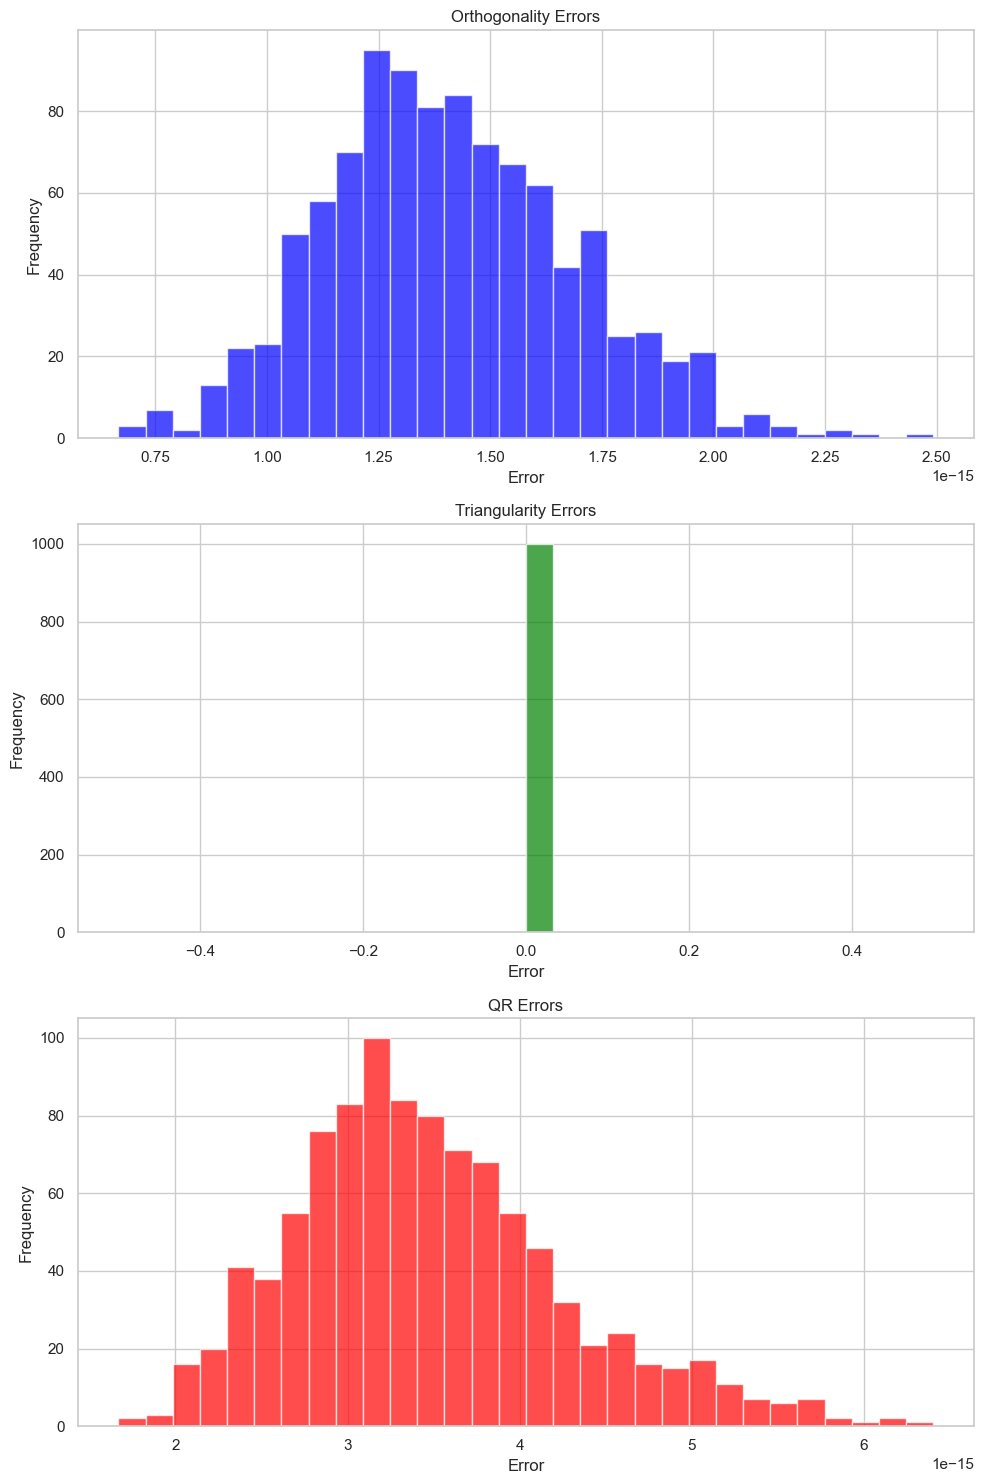

In [26]:
# plot the errors as histograms.
# make sure the histograms are rendered visually appealing.
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].hist(orthogonality_errors, bins=30, color='blue', alpha=0.7)
axs[0].set_title('Orthogonality Errors')
axs[0].set_xlabel('Error')
axs[0].set_ylabel('Frequency')

axs[1].hist(triangularity_errors, bins=30, color='green', alpha=0.7)
axs[1].set_title('Triangularity Errors')
axs[1].set_xlabel('Error')
axs[1].set_ylabel('Frequency')

axs[2].hist(qr_errors, bins=30, color='red', alpha=0.7)
axs[2].set_title('QR Errors')
axs[2].set_xlabel('Error')
axs[2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [28]:
# print the final QR decomposition results in a pretty format.
print("Original Matrix (A):")
print(np.array2string(a, precision=2, suppress_small=True))
print("\nQ Matrix:")
print(np.array2string(q, precision=2, suppress_small=True))
print("\n Q^T Q Matrix:")
print(np.array2string(q.T@q, precision=2, suppress_small=True))
print("\nR Matrix:")
print(np.array2string(r, precision=2, suppress_small=True))
print("\nQR Error (A - Q * R):")
print(np.array2string(a - q @ r, precision=2, suppress_small=True))

Original Matrix (A):
[[ 0.21 -0.08 -0.44 -0.37 -0.4   0.24 -0.27  1.36 -0.22  0.89]
 [ 0.98 -0.7   0.82 -1.04 -2.02 -1.08  2.4   0.58  1.52  1.12]
 [-0.34  0.18  1.03 -0.73  0.13  0.49  1.25  0.81  0.64  0.03]
 [ 0.78  1.04 -0.19 -0.24  0.17 -1.17  0.95  0.59  0.19  0.05]
 [-1.5  -1.09 -1.35  0.05  0.57  1.53  1.23 -0.51 -0.4   1.95]
 [-1.05  0.11 -0.39  1.05 -1.02 -0.85 -1.71 -0.08 -0.92  0.17]
 [-1.87 -0.4  -0.9   0.85 -1.88 -0.61  0.02 -0.05  0.25  0.31]
 [-0.32 -0.64  1.08 -1.03 -0.52 -0.58 -0.73  1.42 -0.23  0.35]
 [-1.3   0.49 -0.76  1.23 -1.16 -0.62 -0.98 -1.1   1.06 -0.79]
 [ 0.04 -0.25  1.15  0.42 -0.75 -1.28  1.18  0.65  1.07 -1.33]]

Q Matrix:
[[-0.06 -0.06  0.26 -0.21  0.28  0.2  -0.24  0.78 -0.28 -0.14]
 [-0.3  -0.48 -0.04  0.02  0.69  0.13  0.22 -0.26  0.1  -0.23]
 [ 0.1   0.13 -0.56 -0.51 -0.09  0.44  0.34  0.14  0.19 -0.14]
 [-0.24  0.49  0.13 -0.33  0.24 -0.61  0.35  0.07  0.05 -0.07]
 [ 0.47 -0.45  0.39 -0.22 -0.28 -0.19  0.39  0.   -0.05 -0.34]
 [ 0.33  0.16 -0.09  0